In [1]:
!python -m spacy download -en


✘ No compatible package found for '-en' (spaCy v3.7.4)



In [2]:
!pip install spacy
!pip install wordcloud

In [3]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
from matplotlib.pyplot import imread

In [4]:
book=pd.read_csv("/content/Elon_musk.csv",error_bad_lines=False,encoding='latin-1')

<ipython-input-4-0fccd9ea8748>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv("/content/Elon_musk.csv",error_bad_lines=False,encoding='latin-1')


In [5]:
book

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [6]:
book1=[]
for row in book.Text:
  book1.append(row)
book1

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [7]:
book=book1
book

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [8]:
book=[x.strip() for x in book]
book=[x for x in book if x]
book

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [9]:
book=' '.join(book)
book

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [10]:
from nltk.tokenize import TweetTokenizer
tokenizer=TweetTokenizer(strip_handles=True)
tweets=tokenizer.tokenize(book)
print(tweets)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [11]:
tweets_text=' '.join(tweets)
print(tweets_text)

I  m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It  s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won  t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the

In [12]:
no_punc_text=tweets_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [13]:
import re
no_url_text=re.sub("http\S+",'',no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
token_words=word_tokenize(no_url_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
print(token_words)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [16]:
len(token_words)

17847

In [17]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('The')
my_stop_words.append('\x92')

In [18]:
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
my_stop_words.append('Haha')
my_stop_words.append('U0001F923')
my_stop_words.append('g')
my_stop_words.append('U0001F5A4')
my_stop_words.append('\x97')
my_stop_words.append('\x93')
my_stop_words.append('\x94')
my_stop_words.append('U043D')
my_stop_words.append('U0001F1EA')
my_stop_words.append('U0001F1EA')
no_stop_words=[word for word in token_words if word not in my_stop_words]
print(no_stop_words)

['I', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'haha', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Yes', 'Once', 'predict', 'cash',

In [20]:
len(no_stop_words)

11516

In [21]:
lower_words=[Text.lower() for Text in no_stop_words]

In [22]:
print(lower_words)

['i', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'it', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'once', 'predict', 'cash',

In [23]:
from nltk.stem import PorterStemmer
stem=PorterStemmer()
stemmed_words=[stem.stem(word) for word in lower_words]
print(stemmed_words)

['i', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'entertain', 'outcom', 'like', 'just', 'sent', 'just', 'agre', 'clubhous', 'it', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'thi', 'true', 'power', 'haha', 'ani', 'crypto', 'wallet', 'give', 'privat', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'ye', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'd

In [24]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

i alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power haha any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable it meant price countries only difference taxes shipping this intended earth 

In [25]:
lemmas=[tokens.lemma_ for tokens in doc]
print(lemmas)

['I', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertain', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', '

In [26]:
clean_tweets=' '.join(lemmas)

In [27]:
#Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(lemmas)

In [28]:
X

<11541x3407 sparse matrix of type '<class 'numpy.int64'>'
	with 11105 stored elements in Compressed Sparse Row format>

In [29]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

0
ðogecoin   3406
zone       3405
zon        3404
zip        3403
zero       3402
zenit      3401
zealand    3400
yup        3399
your       3398
young      3397
you        3396
york       3395
yolt       3394
yoda       3393
yo         3392
yet        3391
yesterday  3390
yes        3389
yearold    3388
year       3387

In [30]:
print(vectorizer.vocabulary_)

{'alien': 194, 'ray': 2346, 'trace': 3008, 'cyberpunk': 767, 'hdr': 1357, 'nextlevel': 1959, 'have': 1352, 'try': 3039, 'great': 1304, 'interview': 1555, 'doge': 890, 'underestimate': 3170, 'congratulation': 675, 'tesla': 2914, 'china': 584, 'amazing': 217, 'execution': 1058, 'last': 1639, 'year': 3387, 'now': 1987, 'next': 1958, 'even': 1032, 'happy': 1339, 'new': 1956, 'ox': 2088, 'frodo': 1207, 'underdoge': 3169, 'all': 197, 'thought': 2950, 'would': 3372, 'fail': 1092, 'himself': 1401, 'thank': 2925, 'indeed': 1496, 'tweet': 3055, 'definitely': 804, 'represent': 2412, 'realworld': 2361, 'time': 2966, 'allocation': 199, 'entertain': 1001, 'outcome': 2067, 'likely': 1693, 'just': 1597, 'send': 2555, 'agree': 179, 'clubhouse': 613, 'it': 1574, 'get': 1266, 'real': 2356, 'buy': 502, 'dogecoin': 892, 'lil': 1694, 'toddler': 2978, 'hodler': 1407, 'he': 1358, 'issue': 1573, 'sentencing': 2560, 'seem': 2547, 'bit': 418, 'high': 1392, 'fix': 1152, 'please': 2181, 'unlock': 3194, 'account': 

In [31]:
print(vectorizer.get_feature_names_out()[50:100])

['250kw' '25gunsteslacom' '25k' '25th' '28' '28th' '29' '2k' '2nd' '2v'
 '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800' '394'
 '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445' '448'
 '4530' '4680' '479000' '48' '4d' '4th' '50' '50000' '50k' '60' '60000'
 '65' '69420' '6f' '6k' '727']


In [32]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
print(X.toarray().shape)

(11541, 3407)


In [34]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(lemmas)

In [35]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['actually' 'ai' 'also' 'back' 'big' 'booster' 'car' 'come' 'cool' 'could'
 'crew' 'day' 'design' 'do' 'dragon' 'earth' 'engine' 'even' 'ever'
 'exactly' 'falcon' 'first' 'flight' 'fsd' 'future' 'get' 'go' 'good'
 'great' 'haha' 'hard' 'high' 'if' 'it' 'just' 'land' 'launch' 'like'
 'look' 'lot' 'love' 'make' 'many' 'mar' 'maybe' 'mission' 'model' 'much'
 'need' 'new' 'next' 'no' 'not' 'ok' 'one' 'part' 'people' 'point'
 'pretty' 'probably' 'production' 'right' 'rocket' 'rt' 'say' 'seem'
 'soon' 'space' 'spacex' 'starlink' 'starship' 'start' 'still' 'super'
 'sure' 'take' 'tesla' 'test' 'thank' 'that' 'there' 'they' 'think' 'this'
 'time' 'true' 'try' 'ufe0f' 'use' 'way' 'we' 'week' 'well' 'will' 'work'
 'would' 'yeah' 'year' 'yes' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ngram_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tf_idf_matrix_ngram=tf_idf_ngram_features.fit_transform(lemmas)

In [37]:
print(tf_idf_matrix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
print(tf_idf_ngram_features.get_feature_names_out())

['10' '100' '13' '20' '2020' '30' '300' '40' '4d' '60' 'able' 'absolutely'
 'access' 'accurate' 'actually' 'add' 'after' 'ago' 'agree' 'ai' 'aim'
 'air' 'all' 'almost' 'already' 'also' 'although' 'always' 'amazing' 'and'
 'another' 'appear' 'apply' 'appreciate' 'approval' 'arm' 'around'
 'article' 'as' 'astronaut' 'at' 'autopilot' 'awesome' 'back' 'bad' 'bar'
 'base' 'battery' 'be' 'become' 'berlin' 'beta' 'big' 'bit' 'boca' 'body'
 'booster' 'brain' 'bring' 'bs' 'build' 'burn' 'but' 'buy' 'cake' 'call'
 'camera' 'can' 'car' 'cargo' 'catch' 'cell' 'ch4' 'chance' 'change'
 'china' 'civilization' 'close' 'cold' 'color' 'come' 'company' 'complete'
 'computer' 'confirm' 'congratulation' 'control' 'cool' 'cost' 'could'
 'course' 'cov' 'crazy' 'create' 'crew' 'critical' 'curevac' 'cybertruck'
 'datum' 'day' 'deep' 'definitely' 'delivery' 'design' 'detail'
 'difference' 'different' 'do' 'dock' 'doge' 'dojo' 'dragon' 'drive'
 'droneship' 'due' 'dumb' 'early' 'earth' 'easy' 'electric' 'enable' 

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,20))
  plt.imshow(wordcloud)
  plt.axis('off')


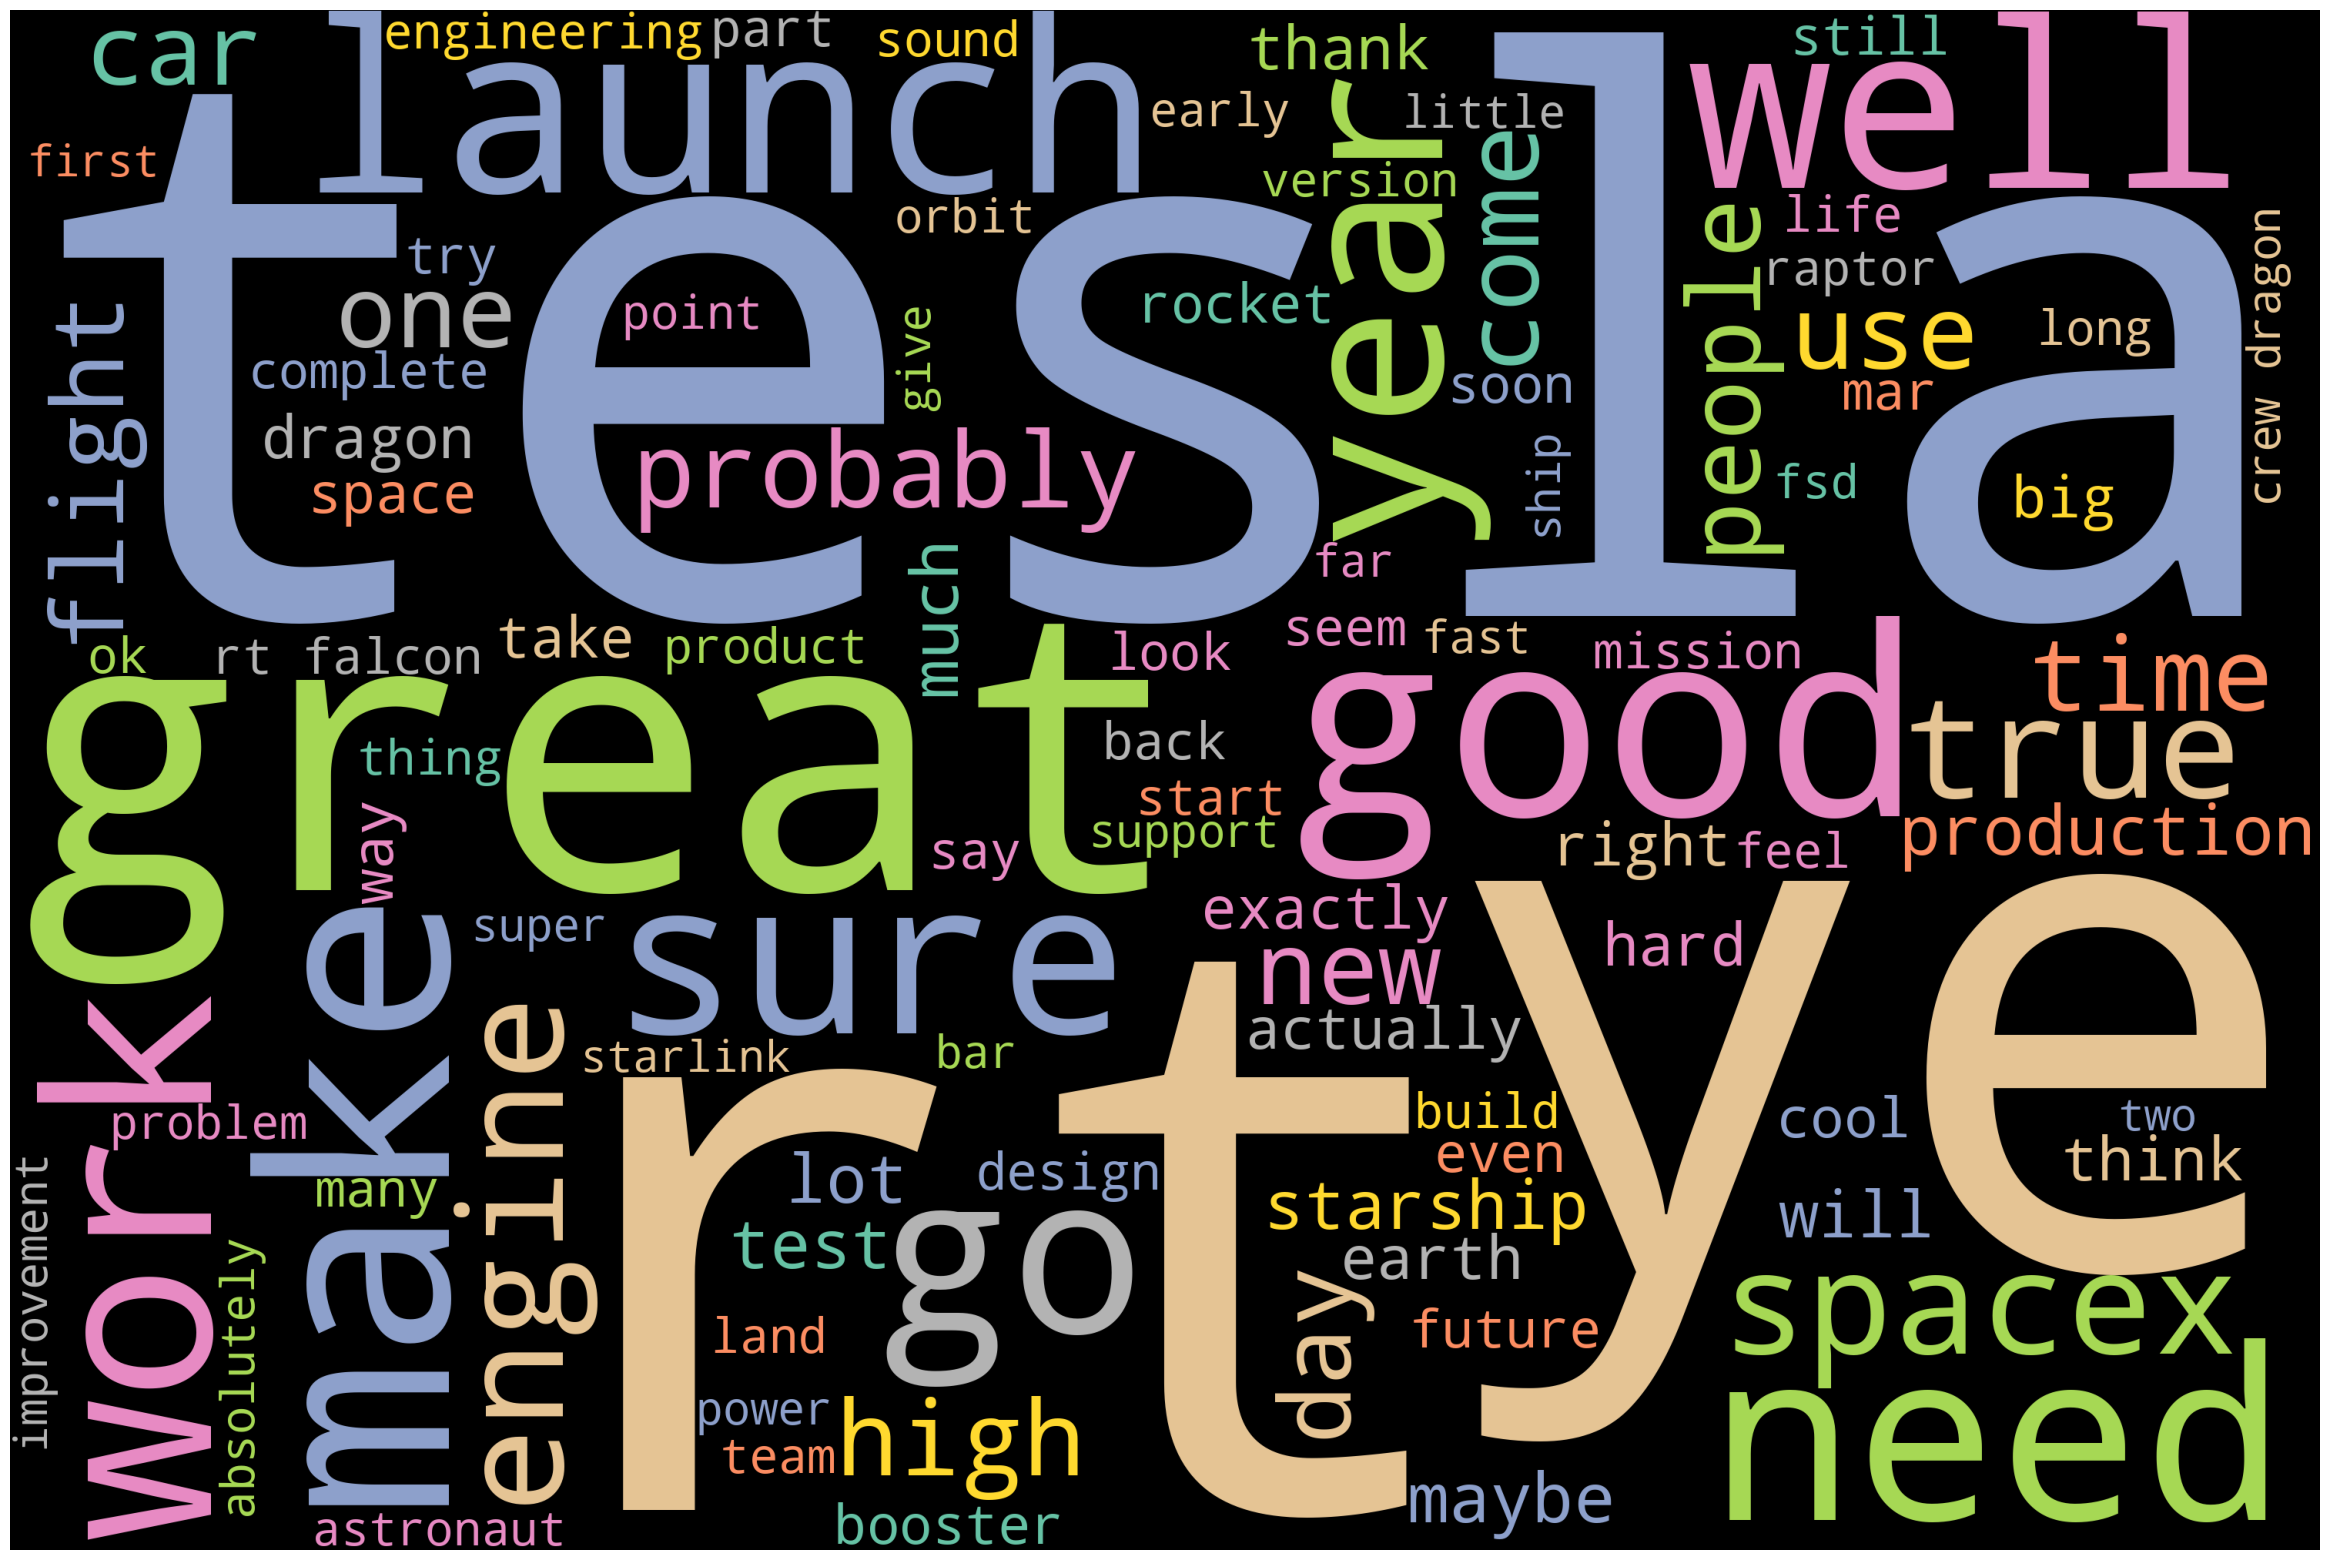

In [40]:
stopwords=STOPWORDS
stopwords.add('haha')
stopwords.add('yeah')
stopwords.add('wow')
#stopwords.add('ye')
#stopwords.add('rt')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_tweets)
plot_cloud(wordcloud)

In [41]:
nlp=spacy.load('en_core_web_sm')
doc_block=nlp(clean_tweets)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [42]:
for token in doc_block[10:30]:
  print(token,token.pos_)

interview NOUN
doge ADJ
underestimate ADJ
congratulation NOUN
tesla NOUN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge NOUN
all DET


In [43]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'rainforest', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'risk', 'start', 'engine', 'shut']


In [44]:
affin=pd.read_csv("/content/Afinn.csv",encoding='latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [45]:
cv=CountVectorizer()
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)
words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key= lambda x:x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['words','Freq']
wd_df

words  Freq
0          tesla    77
1           make    64
2         launch    62
3           year    49
4           work    49
...          ...   ...
1941    priority     1
1942  propaganda     1
1943       click     1
1944     samwise     1
1945      dumber     1

[1946 rows x 2 columns]

<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='words'>

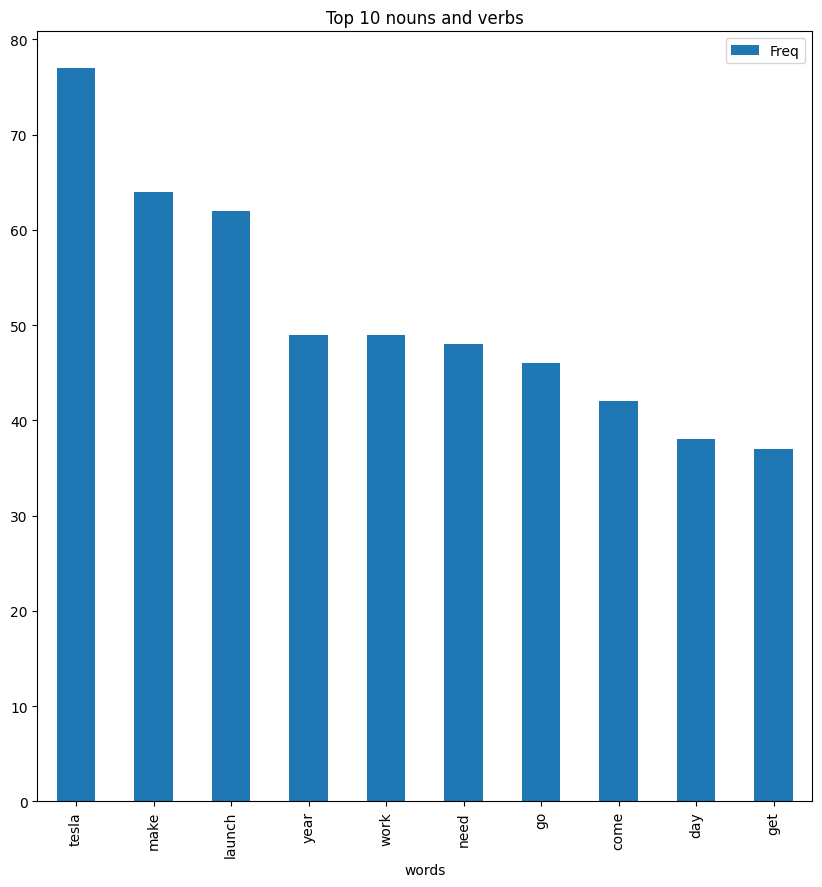

In [46]:
wd_df[:10].plot.bar(x="words",figsize=(10,10),title='Top 10 nouns and verbs')

In [47]:
#Emotion Mining
from nltk import tokenize
sent_tokens=tokenize.sent_tokenize(' '.join(tweets))
sent_tokens

['I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level .',
 'Have you tried it ?',
 'Great interview !',
 'Doge is underestimated Congratulations Tesla China for amazing execution last year .',
 'Now on to the next for even more !',
 '!',
 'Happy New Year of the Ox !',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all .',
 'https://t.co/zGxJFDzzrM Haha thanks :) Indeed !',
 'Tweets definitely do not represent real-world time allocation .',
 'The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app suck

In [48]:
sent_df=pd.DataFrame(sent_tokens,columns=['sentences'])
sent_df

sentences
0    I  m an alien Ray tracing on Cyberpunk with H...
1                                  Have you tried it ?
2                                    Great interview !
3    Doge is underestimated Congratulations Tesla C...
4                   Now on to the next for even more !
..                                                 ...
972  Not actually a payout , just a vesting of stoc...
973  It may never pay out , as the stock can  t b ...
974                                   Details Aug 28 .
975  AI symbiosis while u wait There  s some of th...
976  Samwise Gamgee Altho Dumb and Dumber is <U+000...

[977 rows x 1 columns]

In [49]:
affinity_scores=affin.set_index('word')['value'].to_dict()

In [50]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [51]:
#Defining a function to add the lexicons in each ssentence and storing it
nlp=spacy.load('en_core_web_sm')
lexicons=affinity_scores
def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    print(sentence)
    for word in sentence:
      sent_score+=lexicons.get(word.lemma_,0)
  return sent_score



In [52]:
calculate_sentiment('flu')

flu


-2

In [53]:
sent_df['sentiment_value']=sent_df['sentences'].apply(calculate_sentiment)
sent_df

I  m an alien Ray tracing on Cyberpunk with HDR is next-level .
Have you tried it ?
Great interview !
Doge is underestimated Congratulations Tesla China for amazing execution last year .
Now on to the next for even more !
!
Happy New Year of the Ox !
https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all .
https://t.co/zGxJFDzzrM Haha thanks :) Indeed !
Tweets definitely do not represent real-world time allocation .
The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It  s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won  t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the

sentences  sentiment_value
0    I  m an alien Ray tracing on Cyberpunk with H...                0
1                                  Have you tried it ?                0
2                                    Great interview !                3
3    Doge is underestimated Congratulations Tesla C...                3
4                   Now on to the next for even more !                0
..                                                 ...              ...
972  Not actually a payout , just a vesting of stoc...                0
973  It may never pay out , as the stock can  t b ...               -4
974                                   Details Aug 28 .                0
975  AI symbiosis while u wait There  s some of th...               -2
976  Samwise Gamgee Altho Dumb and Dumber is <U+000...                0

[977 rows x 2 columns]

In [54]:
#Calculating the word length for each sentence
sent_df['word_count']=sent_df['sentences'].str.split().apply(len)
sent_df

sentences  sentiment_value  \
0    I  m an alien Ray tracing on Cyberpunk with H...                0   
1                                  Have you tried it ?                0   
2                                    Great interview !                3   
3    Doge is underestimated Congratulations Tesla C...                3   
4                   Now on to the next for even more !                0   
..                                                 ...              ...   
972  Not actually a payout , just a vesting of stoc...                0   
973  It may never pay out , as the stock can  t b ...               -4   
974                                   Details Aug 28 .                0   
975  AI symbiosis while u wait There  s some of th...               -2   
976  Samwise Gamgee Altho Dumb and Dumber is <U+000...                0   

     word_count  
0            14  
1             5  
2             3  
3            12  
4             9  
..          ...  
972          12  
973          35  
974           4  
975          48  
976          13  

[977 rows x 3 columns]

In [55]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentences  sentiment_value  \
240  For a second there , I thought that was a pic ...               11   
867  Might be able to https://t.co/FB7e5nOq2E Wheth...               11   
196  Also , w https://t.co/IYdKttVsqk Oh and umm ht...               12   
45   Cryoproof , then install engines Starship SN9 ...               12   
87   This is a good one I whistle Cybertruck doesn ...               13   
682  It  s https://t.co/IxhyT6NuiC Tesla Germany d...               13   
618  The  open  areas https://t.co/rabjKrtQlw Sha...               14   
39   Yes , but engines have a min throttle point wh...               16   
112  Was also thinking that SpaceX Boca should hold...               16   
758  We just haven  t observed the https://t.co/me...               17   

     word_count  
240          69  
867          64  
196         100  
45           75  
87           31  
682          72  
618         145  
39          240  
112          87  
758          69

In [56]:
sent_df['sentiment_value'].describe()

count    977.000000
mean       1.366428
std        2.689692
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [57]:
sent_df[sent_df['sentiment_value']<=10].head()

sentences  sentiment_value  \
0  I  m an alien Ray tracing on Cyberpunk with H...                0   
1                                Have you tried it ?                0   
2                                  Great interview !                3   
3  Doge is underestimated Congratulations Tesla C...                3   
4                 Now on to the next for even more !                0   

   word_count  
0          14  
1           5  
2           3  
3          12  
4           9

In [58]:
sent_df[sent_df['sentiment_value']>10].head()

sentences  sentiment_value  \
39   Yes , but engines have a min throttle point wh...               16   
45   Cryoproof , then install engines Starship SN9 ...               12   
87   This is a good one I whistle Cybertruck doesn ...               13   
112  Was also thinking that SpaceX Boca should hold...               16   
169  It will most likely make sense for Starlink to...               11   

     word_count  
39          240  
45           75  
87           31  
112          87  
169          87

In [59]:
sent_df['index']=range(0,len(sent_df))

In [60]:
sent_df

sentences  sentiment_value  \
0    I  m an alien Ray tracing on Cyberpunk with H...                0   
1                                  Have you tried it ?                0   
2                                    Great interview !                3   
3    Doge is underestimated Congratulations Tesla C...                3   
4                   Now on to the next for even more !                0   
..                                                 ...              ...   
972  Not actually a payout , just a vesting of stoc...                0   
973  It may never pay out , as the stock can  t b ...               -4   
974                                   Details Aug 28 .                0   
975  AI symbiosis while u wait There  s some of th...               -2   
976  Samwise Gamgee Altho Dumb and Dumber is <U+000...                0   

     word_count  index  
0            14      0  
1             5      1  
2             3      2  
3            12      3  
4             9      4  
..          ...    ...  
972          12    972  
973          35    973  
974           4    974  
975          48    975  
976          13    976  

[977 rows x 4 columns]

<ipython-input-61-cd783beed23a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'],norm_hist=True)


<Axes: xlabel='sentiment_value', ylabel='Density'>

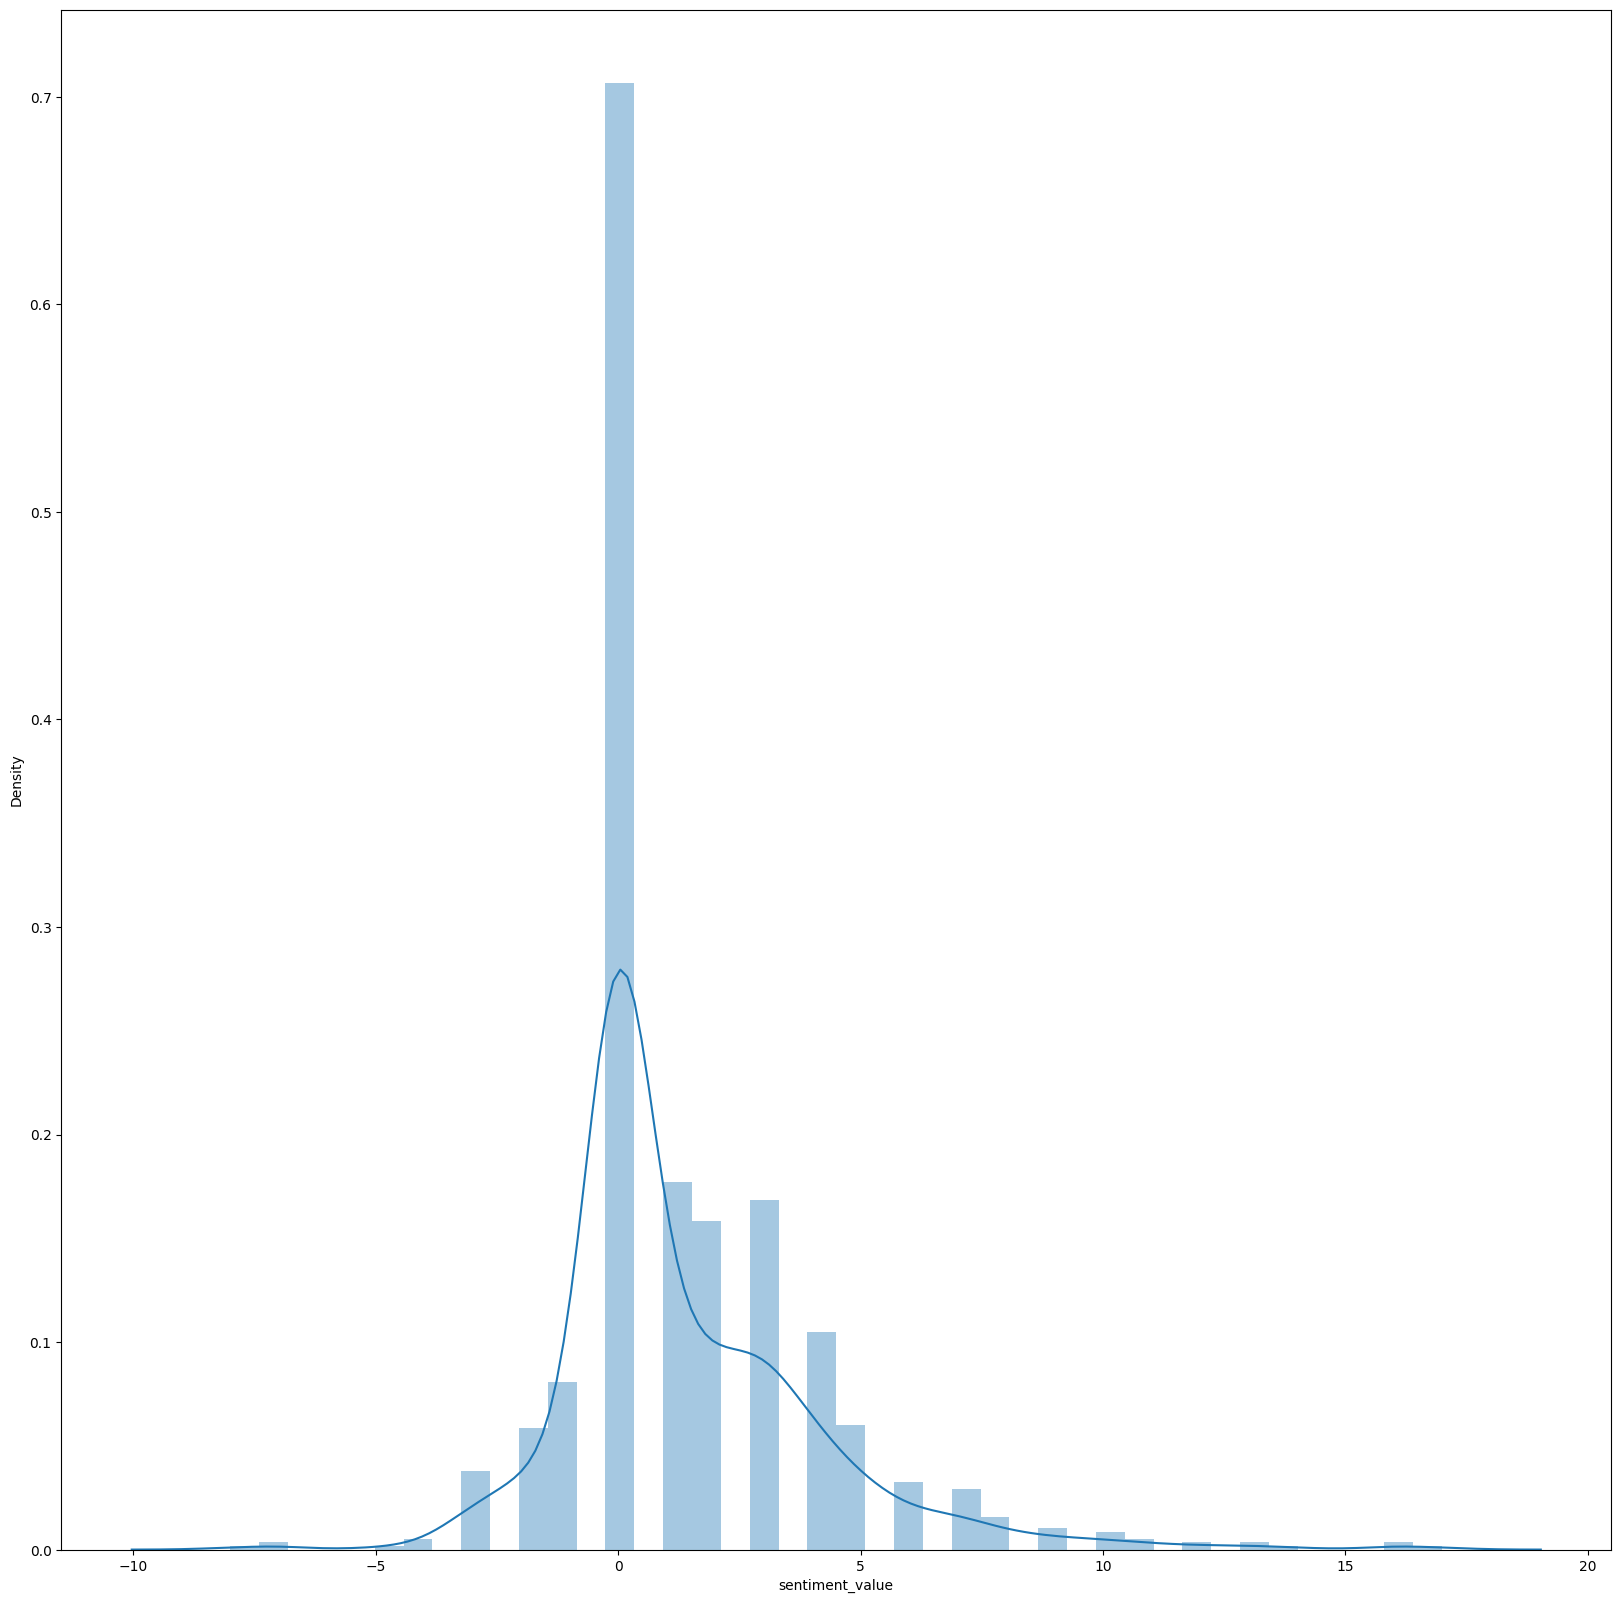

In [61]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.distplot(sent_df['sentiment_value'],norm_hist=True)

<Axes: xlabel='index', ylabel='sentiment_value'>

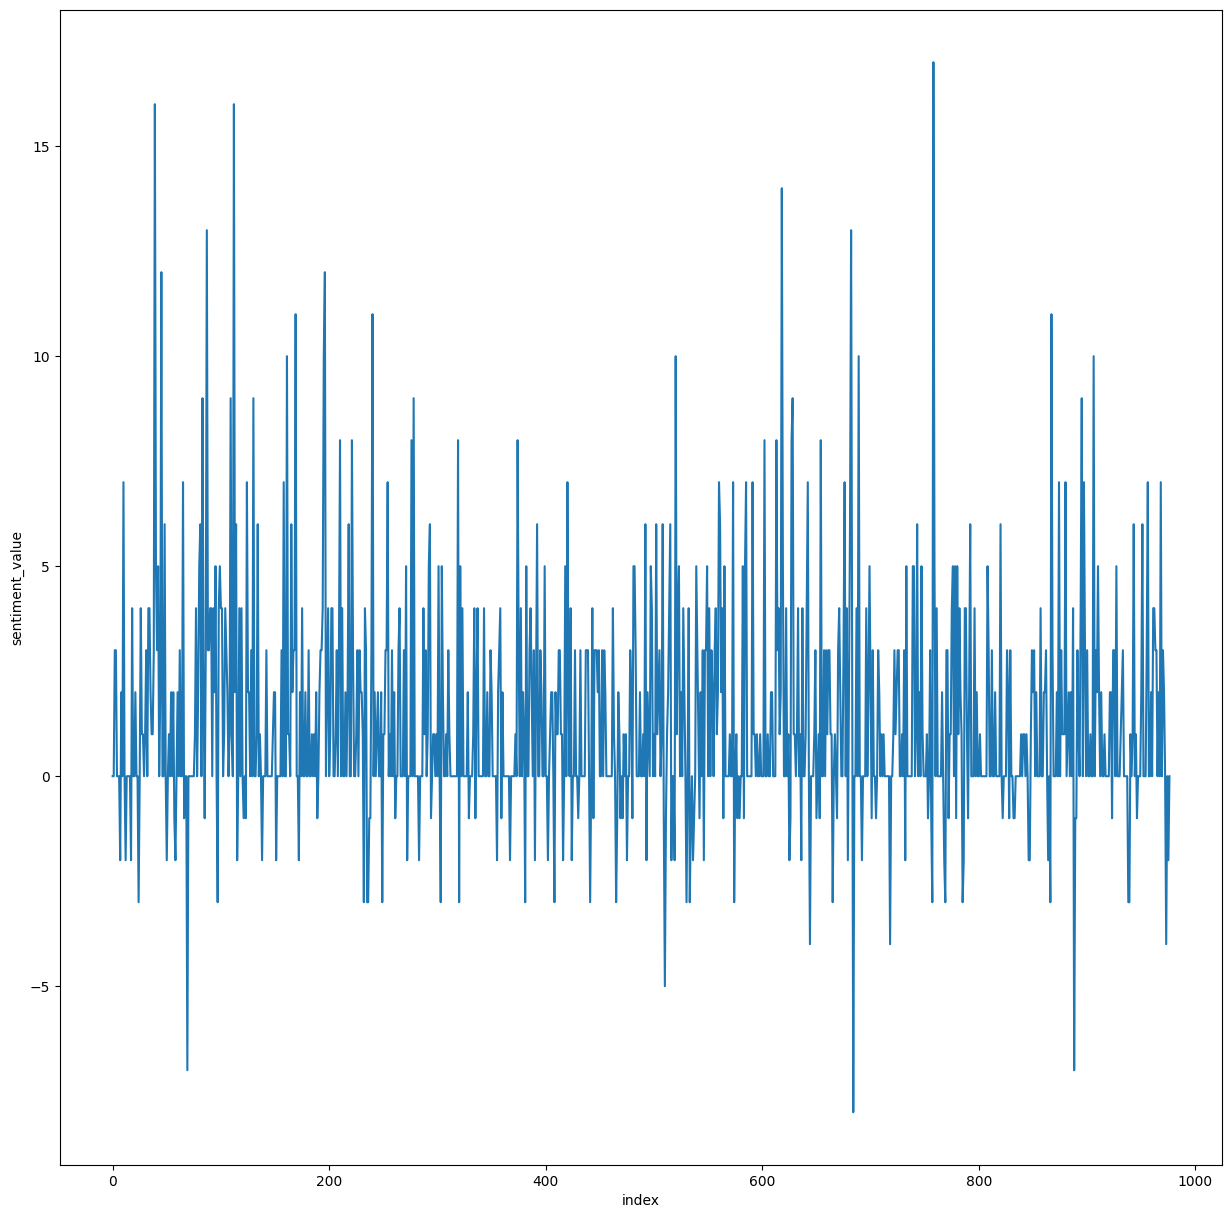

In [62]:

plt.figure(figsize=(15,15))
sns.lineplot(x='index',y='sentiment_value',data=sent_df)

<Axes: xlabel='word_count', ylabel='sentiment_value'>

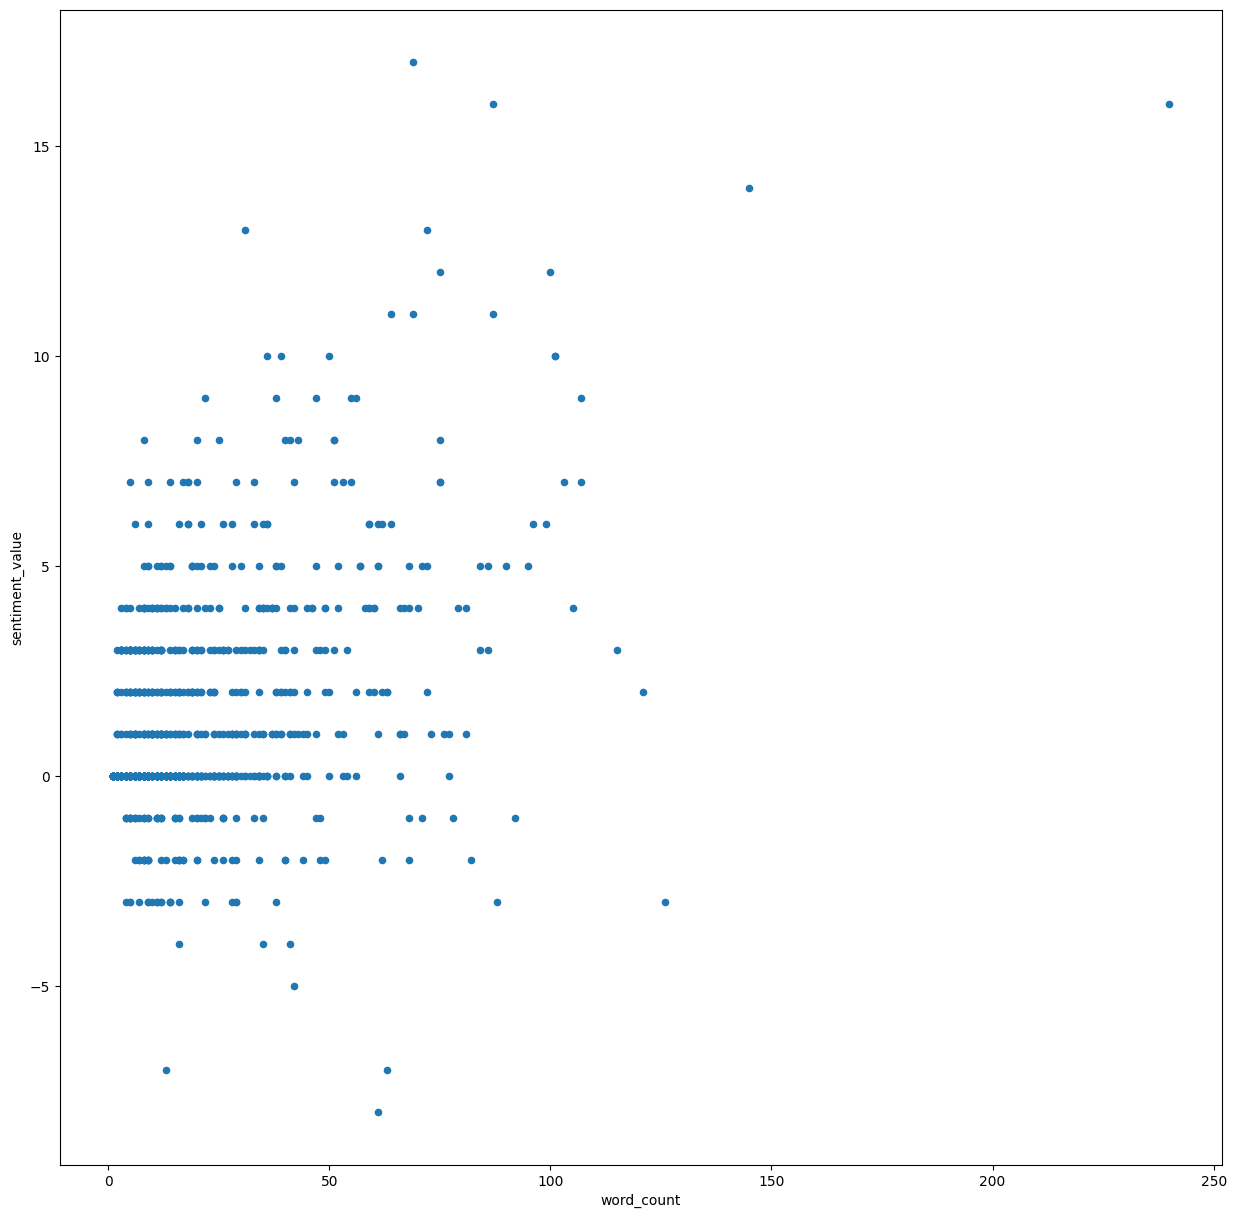

In [63]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(15,15))

In [64]:
sent_df['status']=sent_df['sentiment_value'].apply(lambda x:'positive' if x>0 else('negative' if x<0 else 'neutral'))

In [65]:
sent_df

sentences  sentiment_value  \
0    I  m an alien Ray tracing on Cyberpunk with H...                0   
1                                  Have you tried it ?                0   
2                                    Great interview !                3   
3    Doge is underestimated Congratulations Tesla C...                3   
4                   Now on to the next for even more !                0   
..                                                 ...              ...   
972  Not actually a payout , just a vesting of stoc...                0   
973  It may never pay out , as the stock can  t b ...               -4   
974                                   Details Aug 28 .                0   
975  AI symbiosis while u wait There  s some of th...               -2   
976  Samwise Gamgee Altho Dumb and Dumber is <U+000...                0   

     word_count  index    status  
0            14      0   neutral  
1             5      1   neutral  
2             3      2  positive  
3            12      3  positive  
4             9      4   neutral  
..          ...    ...       ...  
972          12    972   neutral  
973          35    973  negative  
974           4    974   neutral  
975          48    975  negative  
976          13    976   neutral  

[977 rows x 5 columns]

In [66]:
sent_df['status'].value_counts()

positive    456
neutral     411
negative    110
Name: status, dtype: int64

<Axes: xlabel='status', ylabel='count'>

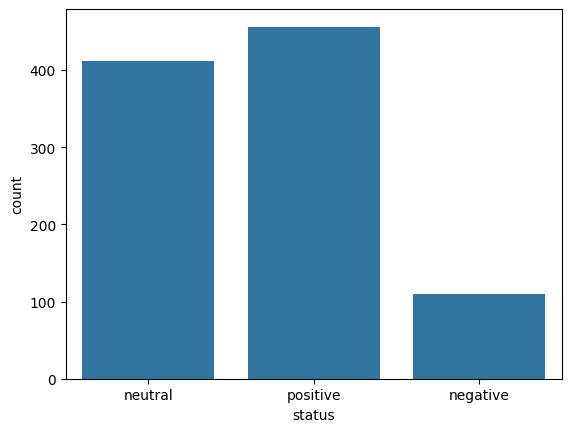

In [67]:
sns.countplot(x='status',data=sent_df)

In [68]:
sentiment_index=sent_df['status'].value_counts().index

In [69]:
sentiment_index

Index(['positive', 'neutral', 'negative'], dtype='object')

([<matplotlib.patches.Wedge at 0x7c99875baaa0>,
 [Text(0.11474674631179688, 1.093998713075503, 'positive'),
  Text(-0.48658353999047826, -0.9865274748380478, 'neutral'),
  Text(1.0319033593999378, -0.38101897178371935, 'negative')],
 [Text(0.0625891343518892, 0.596726570768456, '46.67%'),
  Text(-0.26540920363116993, -0.5381058953662078, '42.07%'),
  Text(0.5628563778545115, -0.20782853006384688, '11.26%')])

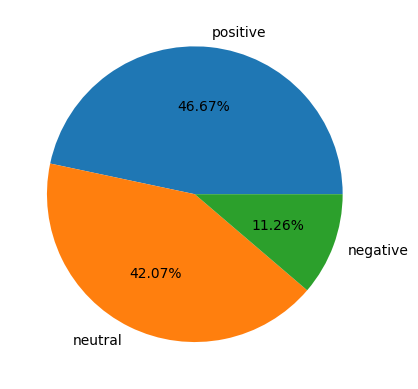

In [70]:
plt.pie(sent_df['status'].value_counts(),autopct='%1.2f%%',labels=sentiment_index)

###As we can see that most data points are concentrated in 0 to  5 range we can say that many statements are neutral